In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
fp_daily = "data/raw_data_daily.csv"
df_daily = pd.read_csv(fp_daily)
df_daily = df_daily.sort_index(ascending=False)
df_daily = df_daily.reset_index(drop=True)
df_daily

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-13T24:00:00Z,NaN,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
416,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
417,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
418,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0


In [7]:
df_daily.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'dateChecked', 'death', 'hospitalized', 'totalTestResults',
       'lastModified', 'recovered', 'total', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash'],
      dtype='object')

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_daily)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,dateChecked,death,hospitalized,totalTestResults,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-13T24:00:00Z,NaN,NaN,0,2020-01-13T24:00:00Z,NaN,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-14T24:00:00Z,NaN,NaN,0,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-15T24:00:00Z,NaN,NaN,0,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-16T24:00:00Z,NaN,NaN,0,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-17T24:00:00Z,NaN,NaN,0,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
5,20200118,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-18T24:00:00Z,NaN,NaN,0,2020-01-18T24:00:00Z,NaN,0,0,0,0,0,0,0,2394f592b3b27ff21aaebc736a404177acd71927
6,20200119,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-19T24:00:00Z,NaN,NaN,0,2020-01-19T24:00:00Z,NaN,0,0,0,0,0,1,0,c989920d1706d11b097eaaf5a20bc4d081d1208c
7,20200120,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-20T24:00:00Z,NaN,NaN,0,2020-01-20T24:00:00Z,NaN,0,0,0,0,0,0,0,776e42ed9cc6026fcf1e885daaa7dff4fb4b0b3f
8,20200121,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-21T24:00:00Z,NaN,NaN,0,2020-01-21T24:00:00Z,NaN,0,0,0,0,0,1,0,1eeddf821d7b9cd08a5ff80a5dca47f4693e4eba
9,20200122,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22T24:00:00Z,NaN,NaN,1,2020-01-22T24:00:00Z,NaN,0,0,0,0,0,0,1,ffee280533875f8ba1b85294085e74919fcc3ec2


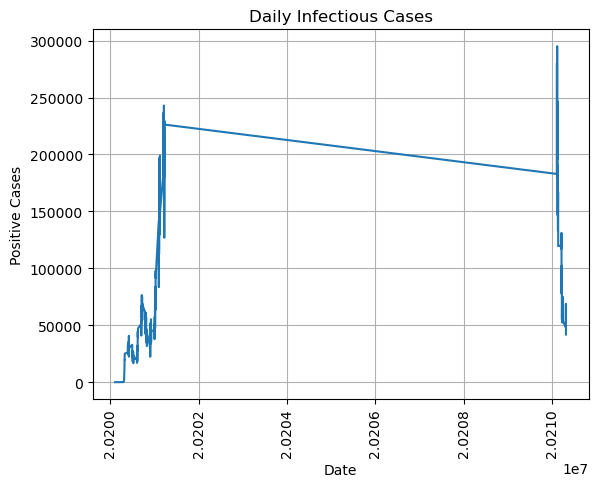

In [11]:
x = df_daily["date"]
y = df_daily["positiveIncrease"]#.cumsum()
#z = df_daily["recoveries"]

plt.plot(x,y)
#plt.plot(x,z)
plt.xticks(rotation=90)
plt.title("Daily Infectious Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid()
plt.show()

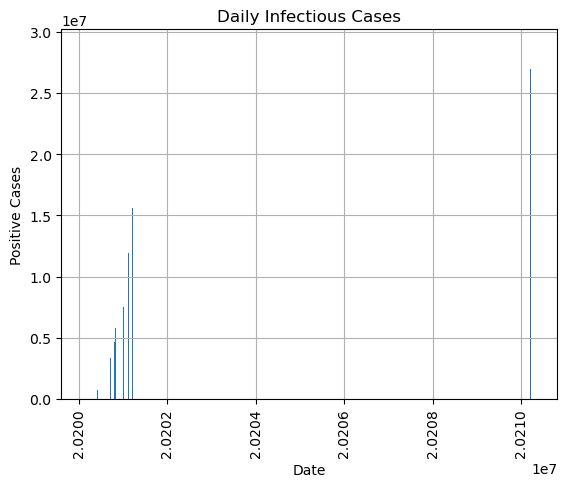

In [13]:
x = df_daily["date"]
y = df_daily["positiveIncrease"].cumsum()
#z = df_daily["recoveries"]

plt.bar(x,y)
#plt.plot(x,z)
plt.xticks(rotation=90)
plt.title("Daily Infectious Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid()
plt.show()

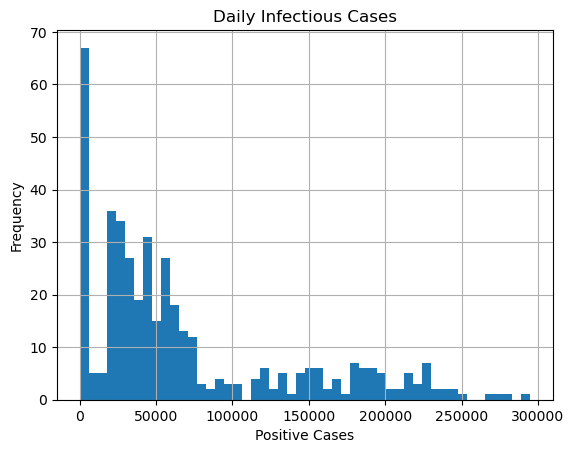

In [17]:
y = df_daily["positiveIncrease"]
plt.title("Daily Infectious Cases")
plt.hist(y, bins=50)
plt.xlabel("Positive Cases")
plt.ylabel("Frequency")
plt.grid()
plt.savefig("data/daily_infectious_cases_hist.png")
plt.show()

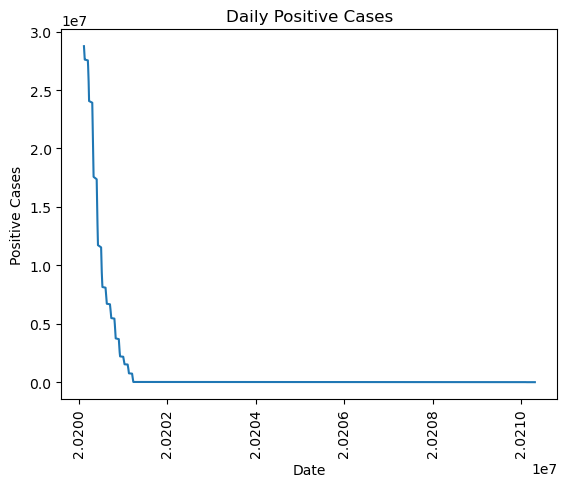

In [85]:
x = df_daily["date"]
y = df_daily["positive"].iloc[::-1]

plt.plot(x,y)
plt.xticks(rotation=90)
plt.title("Daily Positive Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.show()

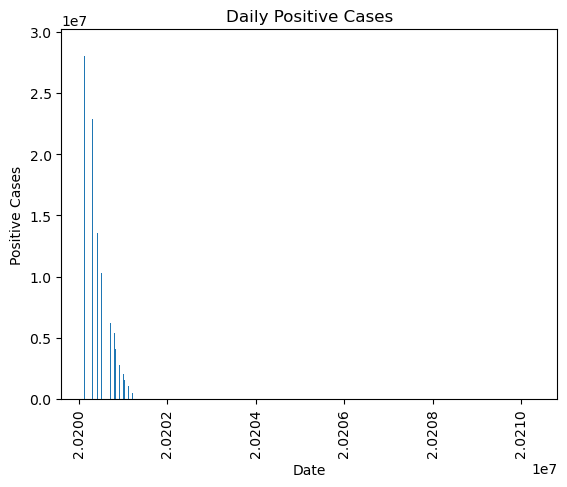

In [86]:
x = df_daily["date"]
y = df_daily["positive"].iloc[::-1]

plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("Daily Positive Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.show()

In [87]:
ser_infectious = df_daily["positive"].iloc[::-1]

In [88]:
# To find recovered cases, we can use the algorithm
# If next day is smaller than day before: day beofre positive - day of positive - day of deaths
# If next day is bigger than day before: (next day postitive - next day increase)
# recovered = positive day before - positive day of (deaths + )

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
419,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
418,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
417,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
416,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
415,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


In [71]:
df_daily

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
419,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
418,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
417,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
416,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
415,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


In [92]:
# Infectious will be the increasing number of cases, droping by that same number five days later
df_daily["deathIncrease"] = df_daily["deathIncrease"].fillna(0)
df_daily["positiveIncrease"] = df_daily["positiveIncrease"].fillna(0)
df_daily["netIncrease"] = df_daily["positiveIncrease"] - df_daily["deathIncrease"]
df_daily["infectious"] = df_daily["netIncrease"].rolling(window=7).sum().fillna(0)
df_daily

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,netIncrease,infectious
0,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff,0,0.0
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8,0,0.0
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047,0,0.0
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d,0,0.0
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0,64387,431597.0
416,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3,63744,422914.0
417,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c,66566,416764.0
418,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0,58335,405701.0


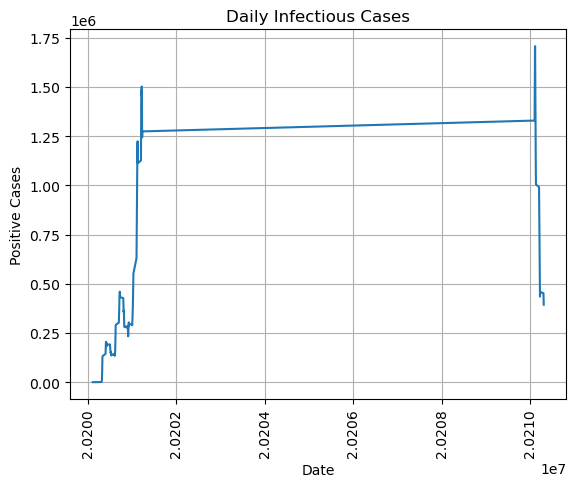

In [93]:
x = df_daily["date"]
y = df_daily["infectious"]

plt.plot(x,y)
plt.xticks(rotation=90)
plt.title("Daily Infectious Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid()
plt.show()

In [94]:
df_daily["cumulativeCases"] = df_daily["positiveIncrease"].cumsum()
#df_daily["recovered"] = df_daily["cumulativeCases"]df_daily["death"]
df_daily

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,netIncrease,infectious,cumulativeCases
0,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff,0,0.0,0
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8,0,0.0,0
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047,0,0.0,0
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d,0,0.0,0
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0,64387,431597.0,28520365
416,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3,63744,422914.0,28585852
417,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c,66566,416764.0,28654639
418,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0,58335,405701.0,28714654


In [108]:
df_daily["recoveries"] = df_daily["cumulativeCases"].shift(periods=10, fill_value=0) #- df_daily["deathIncrease"]
df_daily

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,netIncrease,infectious,cumulativeCases,recoveries,cumilativeDeaths
0,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff,0,0.0,0,0,0
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8,0,0.0,0,0,0
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047,0,0.0,0,0,0
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d,0,0.0,0,0,0
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0,64387,431597.0,28520365,27880280,508665
416,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3,63744,422914.0,28585852,27932810,510408
417,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c,66566,416764.0,28654639,28001915,512629
418,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0,58335,405701.0,28714654,28075173,514309


In [96]:
df_daily["cumilativeDeaths"] =  df_daily["deathIncrease"].cumsum()
df_daily

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,netIncrease,infectious,cumulativeCases,recoveries,cumilativeDeaths
0,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff,0,0.0,0,0,0
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8,0,0.0,0,0,0
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047,0,0.0,0,0,0
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d,0,0.0,0,0,0
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0,64387,431597.0,28520365,27877831,508665
416,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3,63744,422914.0,28585852,27931067,510408
417,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c,66566,416764.0,28654639,27999694,512629
418,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0,58335,405701.0,28714654,28073493,514309


In [100]:
finalDeaths = df_daily["cumilativeDeaths"].iloc[-1]
finalCases = df_daily["cumulativeCases"].iloc[-1]
finalRecoveries = df_daily["recoveries"].iloc[-1]
diff = finalCases - finalDeaths 
diff

28241338

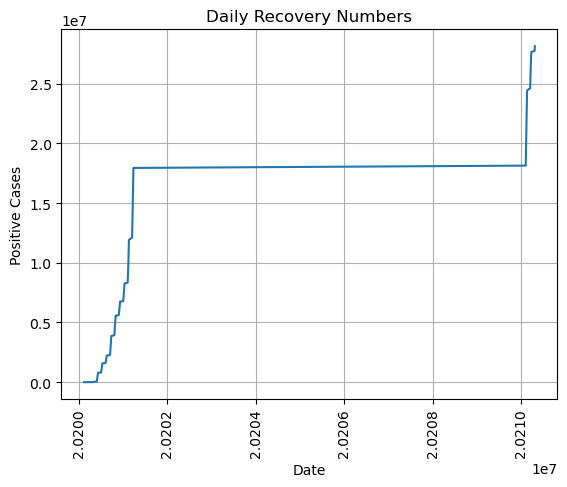

In [109]:
x = df_daily["date"]
#y = df_daily["infectious"]
z = df_daily["recoveries"]

#plt.plot(x,y)
plt.plot(x,z)
plt.xticks(rotation=90)
plt.title("Daily Recovery Numbers")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid()
plt.show()

In [110]:
z.value_counts()

recoveries
0           16
2           13
7            9
5            7
3            3
            ..
2239217      1
2206985      1
2176098      1
2149114      1
28150738     1
Name: count, Length: 376, dtype: int64

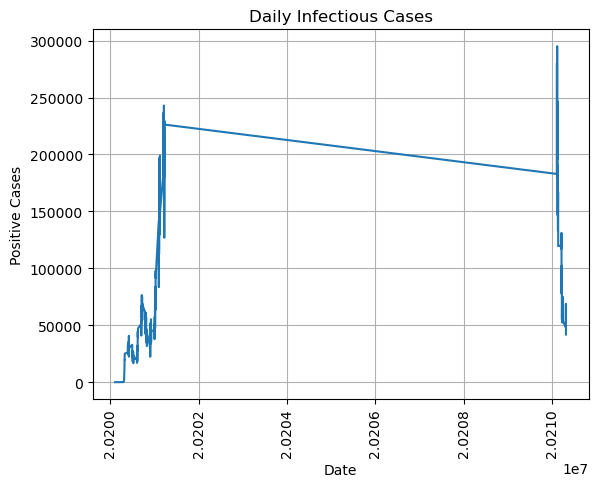

In [101]:
x = df_daily["date"]
y = df_daily["positiveIncrease"].fillna(0)
#z = df_daily["recoveries"]

plt.plot(x,y)
#plt.plot(x,z)
plt.xticks(rotation=90)
plt.title("Daily Infectious Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid()
plt.show()

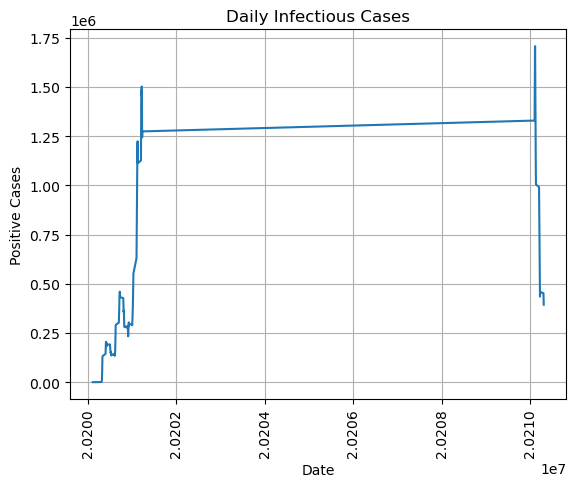

In [102]:
x = df_daily["date"]
y = df_daily["infectious"]
#z = df_daily["recoveries"]

plt.plot(x,y)
#plt.plot(x,z)
plt.xticks(rotation=90)
plt.title("Daily Infectious Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid()
plt.show()

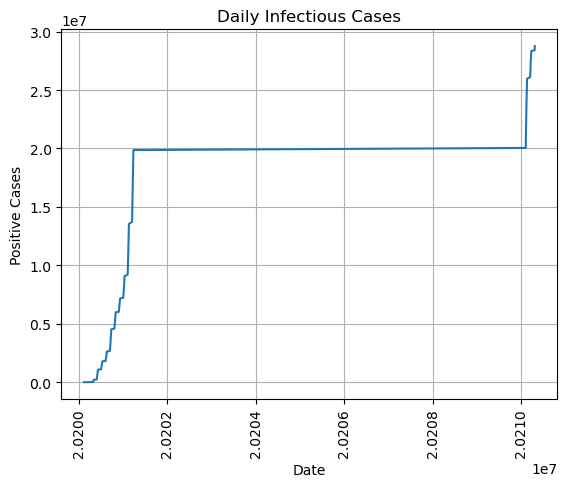

In [105]:
x = df_daily["date"]
y = df_daily["cumulativeCases"]
#z = df_daily["recoveries"]

plt.plot(x,y)
#plt.plot(x,z)
plt.xticks(rotation=90)
plt.title("Daily Infectious Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid()
plt.show()

In [1]:
x = df_daily["date"]
y = df_daily["positiveIncrease"]
#z = df_daily["recoveries"]

plt.plot(x,y)
#plt.plot(x,z)
plt.xticks(rotation=90)
plt.title("Daily Infectious Cases")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.grid()
plt.show()

NameError: name 'df_daily' is not defined

<BarContainer object of 420 artists>

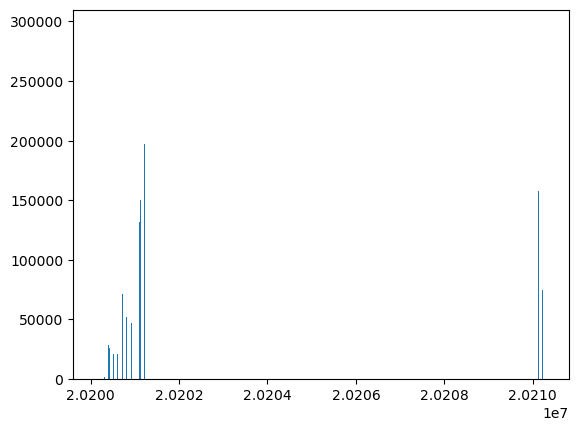

In [117]:
x = df_daily["date"]
y = df_daily["positiveIncrease"]
#z = df_daily["recoveries"]

plt.bar(x,y)

In [ ]:
bdf_daily["positiveIncrease"].describe()

count       420.000000
mean      68467.830952
std       68682.221496
min           0.000000
25%       22462.500000
50%       44664.500000
75%       89684.250000
max      295121.000000
Name: positiveIncrease, dtype: float64

In [118]:
df_daily["positiveIncrease"].value_counts()

positiveIncrease
0        35
1         9
2         3
57144     2
91293     1
         ..
43104     1
44300     1
39720     1
39131     1
41835     1
Name: count, Length: 375, dtype: int64

In [106]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_daily)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,dateChecked,death,hospitalized,totalTestResults,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,netIncrease,infectious,cumulativeCases,recoveries,cumilativeDeaths
0,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-13T24:00:00Z,NaN,NaN,0,2020-01-13T24:00:00Z,NaN,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff,0,0.0,0,0,0
1,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-14T24:00:00Z,NaN,NaN,0,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8,0,0.0,0,0,0
2,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-15T24:00:00Z,NaN,NaN,0,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047,0,0.0,0,0,0
3,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-16T24:00:00Z,NaN,NaN,0,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d,0,0.0,0,0,0
4,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-17T24:00:00Z,NaN,NaN,0,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6,0,0.0,0,0,0
5,20200118,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-18T24:00:00Z,NaN,NaN,0,2020-01-18T24:00:00Z,NaN,0,0,0,0,0,0,0,2394f592b3b27ff21aaebc736a404177acd71927,0,0.0,0,0,0
6,20200119,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-19T24:00:00Z,NaN,NaN,0,2020-01-19T24:00:00Z,NaN,0,0,0,0,0,1,0,c989920d1706d11b097eaaf5a20bc4d081d1208c,1,1.0,1,0,0
7,20200120,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-20T24:00:00Z,NaN,NaN,0,2020-01-20T24:00:00Z,NaN,0,0,0,0,0,0,0,776e42ed9cc6026fcf1e885daaa7dff4fb4b0b3f,0,1.0,1,0,0
8,20200121,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-21T24:00:00Z,NaN,NaN,0,2020-01-21T24:00:00Z,NaN,0,0,0,0,0,1,0,1eeddf821d7b9cd08a5ff80a5dca47f4693e4eba,1,2.0,2,0,0
9,20200122,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22T24:00:00Z,NaN,NaN,1,2020-01-22T24:00:00Z,NaN,0,0,0,0,0,0,1,ffee280533875f8ba1b85294085e74919fcc3ec2,0,2.0,2,0,0
